https://climateactiontracker.org/global/temperatures/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows",None)

In [3]:
df = pd.read_excel("data/CAT_2021-05_PublicData_EmissionPathways.xlsx",
                    sheet_name = "Sheet1",
                    index_col = "Label")

df = df.T

df = df.astype(float)

df

Label,Post-COVID-19 Current Policy Projections High,Post-COVID-19 Current Policy Projections Low,Pledges and Targets High,Pledges and Targets Low,Optimistic scenario (net-zero targets),2°C consistent High,2°C consistent Median,2°C consistent Low,1.5°C consistent High,1.5°C consistent Median,1.5°C consistent Low,Historical
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.989277
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.352906
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.529755
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.736477
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.857245
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.668185
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.317032
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.689497
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.038771
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.293654


In [4]:
df.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            ...
            2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64', length=111)

In [5]:
df.columns

Index(['Post-COVID-19 Current Policy Projections High',
       'Post-COVID-19 Current Policy Projections Low',
       'Pledges and Targets High', 'Pledges and Targets Low',
       'Optimistic scenario (net-zero targets)', '2°C consistent High',
       '2°C consistent Median', '2°C consistent Low', '1.5°C consistent High',
       '1.5°C consistent Median', '1.5°C consistent Low', 'Historical'],
      dtype='object', name='Label')

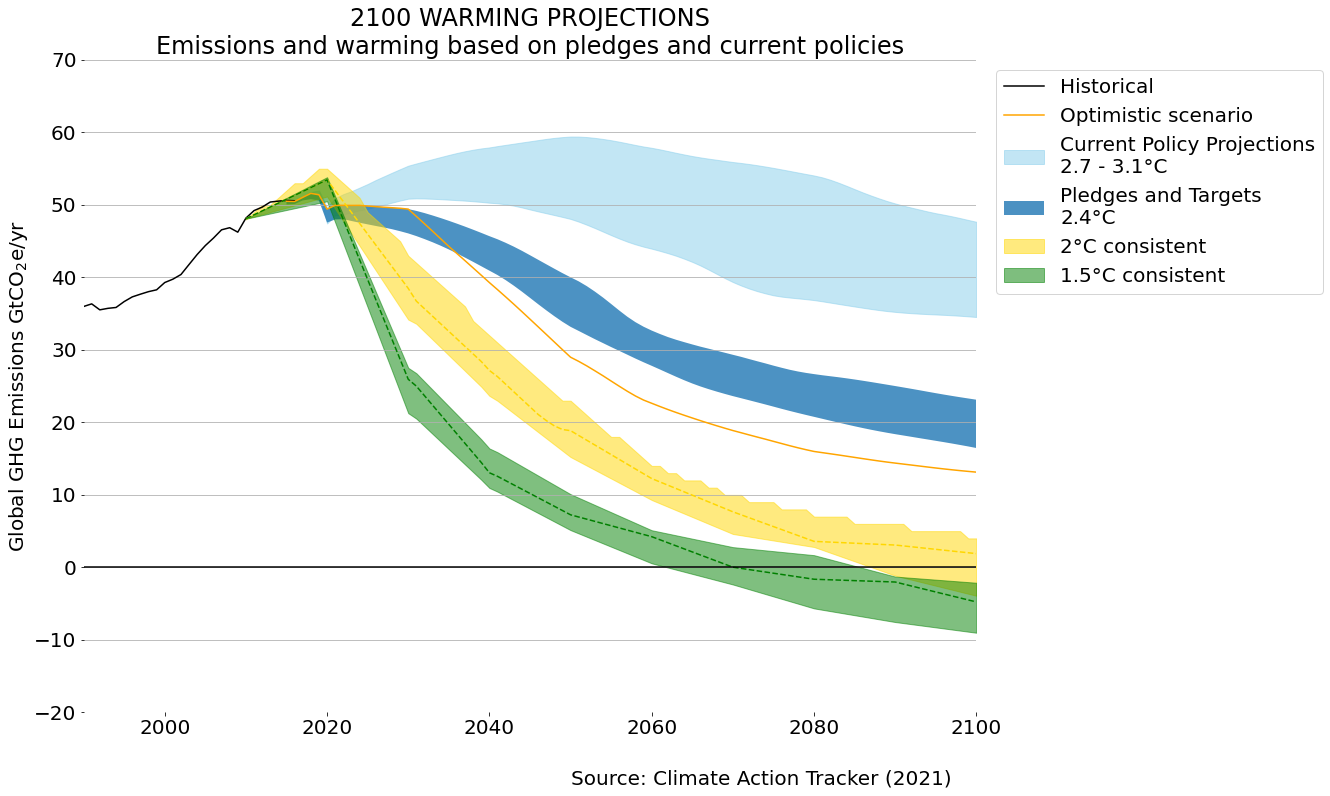

In [9]:
plt.rcParams.update({"font.size":20})

fig, ax = plt.subplots(figsize = (16,12))

ax = df["Historical"].plot(ax = ax, color = "black", label = "Historical")

x = list(df.index)

#Current Policy Projections
ax.fill_between(x,
                df["Post-COVID-19 Current Policy Projections Low"],
               df["Post-COVID-19 Current Policy Projections High"],
                color = "skyblue",
               alpha = 0.5,
               label = "Current Policy Projections\n2.7 - 3.1°C")

#Pledges and targets
ax.fill_between(x, 
               df["Pledges and Targets Low"],
               df["Pledges and Targets High"],
               alpha = 0.8,
               label = "Pledges and Targets \n2.4°C")

#Optimistic scenario net zero targets
df["Optimistic scenario (net-zero targets)"].plot(ax = ax, color = "orange", label = "Optimistic scenario")

#2C Consistent Pathway
df["2°C consistent Median"].plot(ax = ax, color = "gold", linestyle = "--", label = "")
ax.fill_between(x,
               df["2°C consistent Low"],
               df["2°C consistent High"],
               color = "gold",
               alpha = 0.5,
               label = "2°C consistent")

#1.5C Consistent Pathway
df["1.5°C consistent Median"].plot(ax = ax, color = "green", linestyle = "--", label = "")
ax.fill_between(x,
               df["1.5°C consistent Low"],
               df["1.5°C consistent High"],
               color = "green",
               alpha = 0.5,
               label = "1.5°C consistent")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.grid(axis = "y")
plt.axhline(y= 0, color = "black")

plt.title("2100 WARMING PROJECTIONS\nEmissions and warming based on pledges and current policies",) 
         #fontdict ={"weight":"bold", "size":20})

plt.ylabel("Global GHG Emissions GtCO$_2$e/yr")
plt.text(x = 2050, y = -30, s = "Source: Climate Action Tracker (2021)", fontdict = {"size":20} )
plt.axis([1990, 2100, -20, 70])

lgd = plt.legend(bbox_to_anchor= (1.4, 1))
plt.savefig("plots/Global Temperature Projections.jpeg", dpi = 300,
           bbox_inches = "tight")

plt.show()
